# GDP per Capita and its Correlation with Mean Years of Schooling
In this analysis we'll take a look at how closely correlated are GDP per capita and mean years of schooling (both general and gendered)

The year that will be used for the basis of the analysis is 2017.

Sources (from UNDP):

- GDP per Capita (PPP $) - http://hdr.undp.org/en/indicators/194906#
- Mean years of schooling - http://hdr.undp.org/en/indicators/103006#
- Mean years of schooling, females - http://hdr.undp.org/en/indicators/24106#
- Mean years of schooling, males - http://hdr.undp.org/en/indicators/24206#


In [70]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [72]:
#Get GDP Per Capita (PPP $)

gdp_cols = [1, 24]
gdp_skiprows = [x for x in range(198, 219)]
gdp = pd.read_csv('GDP per capita (2017 PPP $).csv', on_bad_lines='skip', encoding='latin-1', header=5, usecols=gdp_cols, skiprows=gdp_skiprows)
gdp.rename(columns={"2017":"GDP_per_Capita"}, inplace=True)
gdp.dropna()
gdp = gdp.query("GDP_per_Capita != '..'")
gdp["GDP_per_Capita"] = pd.to_numeric(gdp["GDP_per_Capita"])
gdp

,Country,GDP_per_Capita
0,Afghanistan,2203
1,Albania,13037
2,Algeria,11551
3,Angola,7311
4,Antigua and Barbuda,19840
...,...,...
179,Uzbekistan,6519
180,Vanuatu,3121
181,Viet Nam,7156
182,Zambia,3485


In [73]:
#Get mean years of schooling data

yrsSchoolCols = [1, 56]
yrsSchool_skiprows = [x for x in range(197, 227)]
yrsSchool = pd.read_csv('Mean years of schooling (years).csv', on_bad_lines='skip', encoding='latin-1', header=6, usecols=yrsSchoolCols, skiprows=yrsSchool_skiprows)
yrsSchool.rename(columns={"2017":"Mean_Years_of_Schooling"}, inplace=True)
yrsSchool.dropna()
yrsSchool = yrsSchool.query("Mean_Years_of_Schooling != '..'")
yrsSchool["Mean_Years_of_Schooling"] = pd.to_numeric(yrsSchool["Mean_Years_of_Schooling"])
yrsSchool

,Country,Mean_Years_of_Schooling
0,Afghanistan,3.8
1,Albania,10.1
2,Algeria,8.0
3,Andorra,10.5
4,Angola,5.1
...,...,...
185,Venezuela (Bolivarian Republic of),10.3
186,Viet Nam,8.2
187,Yemen,3.0
188,Zambia,7.1


## GDP per capita and mean years of schooling

In [83]:
yrsSchool_GDP = pd.merge(yrsSchool, gdp, on="Country")
yrsSchool_GDP

,Country,Mean_Years_of_Schooling,GDP_per_Capita
0,Afghanistan,3.8,2203
1,Albania,10.1,13037
2,Algeria,8.0,11551
3,Angola,5.1,7311
4,Antigua and Barbuda,9.3,19840
...,...,...,...
176,Uzbekistan,11.7,6519
177,Vanuatu,6.8,3121
178,Viet Nam,8.2,7156
179,Zambia,7.1,3485


In [141]:
yrsSchool_GDP[['Mean_Years_of_Schooling', 'GDP_per_Capita']].describe()

,Mean_Years_of_Schooling,GDP_per_Capita
count,181.000000,181.000000
mean,8.650276,19951.558011
std,3.072108,20403.075445
min,1.500000,774.000000
25%,6.400000,4740.000000
50%,8.900000,12703.000000
75%,11.300000,28489.000000
max,14.100000,112823.000000


# Regression Analysis of GDP per capita and mean years of schooling
Based on the R^2 score, GDP per capita and mean years of schooling seem to be closely correlated, however based on the number of outliers it doesn't seem to be the only determining factor

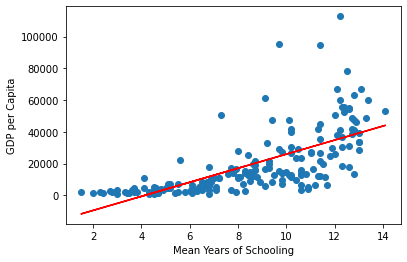

In [112]:
X = yrsSchool_GDP["Mean_Years_of_Schooling"].to_numpy().reshape(-1,1)
Y = yrsSchool_GDP["GDP_per_Capita"].to_numpy().reshape(-1,1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Mean Years of Schooling")
plt.ylabel("GDP per Capita")
plt.show()

In [113]:
r2_score(Y, Y_pred)

0.4449516800281583

## Top 5 Outliers - which countries owe education the least for their success?
These are the countries that we see the least correlation with mean years of schooling and GDP per capita

In [142]:
diff = []
for i in range (len(list(yrsSchool_GDP['GDP_per_Capita']))):
    d = list(yrsSchool_GDP['GDP_per_Capita'])[i] - Y_pred[i][0]
    diff.append({"index": i, "diff":d})

sorted_diff = sorted(diff, key = lambda x: abs(x['diff']))
indices = [x['index'] for x in sorted_diff[-5:]]
yrsSchool_GDP.iloc[indices]

,Country,Mean_Years_of_Schooling,GDP_per_Capita
23,Brunei Darussalam,9.1,60996
78,Ireland,12.5,78128
149,Singapore,11.4,94941
135,Qatar,9.7,95058
97,Luxembourg,12.2,112823


In [81]:
#Get female mean years of schooling data

fem_yrsSchoolCols = [1, 24]
fem_yrsSchool_skiprows = [x for x in range(196, 224)]
fem_yrsSchool = pd.read_csv('Mean years of schooling, female (years).csv', on_bad_lines='skip', encoding='latin-1', header=6, usecols=fem_yrsSchoolCols, skiprows=fem_yrsSchool_skiprows)
fem_yrsSchool.rename(columns={"2017":"Female_Mean_Years_of_Schooling"}, inplace=True)
fem_yrsSchool.dropna()
fem_yrsSchool = fem_yrsSchool.query("Female_Mean_Years_of_Schooling != '..'")
fem_yrsSchool["Female_Mean_Years_of_Schooling"] = pd.to_numeric(fem_yrsSchool["Female_Mean_Years_of_Schooling"])
fem_yrsSchool

,Country,Female_Mean_Years_of_Schooling
0,Afghanistan,1.8
1,Albania,9.9
2,Algeria,7.7
3,Andorra,10.1
4,Angola,4.0
...,...,...
170,Venezuela (Bolivarian Republic of),10.7
171,Viet Nam,7.9
172,Yemen,1.7
173,Zambia,6.7


# Male vs Female Mean Years of schooling - which is a better predictor of GDP per capita?

What we find is that female mean years of schooling seems to be slightly more correlated with GDP per capita. 

In [87]:
femYrsSchool_GDP = pd.merge(fem_yrsSchool, gdp, on='Country')
femYrsSchool_GDP

,Country,Female_Mean_Years_of_Schooling,GDP_per_Capita
0,Afghanistan,1.8,2203
1,Albania,9.9,13037
2,Algeria,7.7,11551
3,Angola,4.0,7311
4,Argentina,10.7,23563
...,...,...,...
161,Uruguay,9.0,21325
162,Uzbekistan,11.3,6519
163,Viet Nam,7.9,7156
164,Zambia,6.7,3485


### Regression Analysis - Female Mean Years of Schooling and GDP per Capita

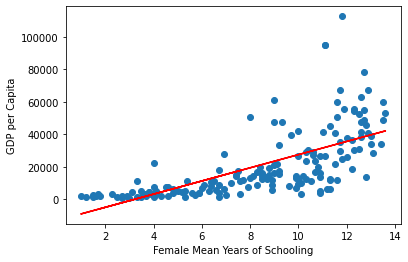

In [96]:
X = femYrsSchool_GDP["Female_Mean_Years_of_Schooling"].to_numpy().reshape(-1,1)
Y = femYrsSchool_GDP["GDP_per_Capita"].to_numpy().reshape(-1,1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Female Mean Years of Schooling")
plt.ylabel("GDP per Capita")
plt.show()

In [97]:
r2_score(Y, Y_pred)

0.44562841079604176

In [99]:
#Get male mean years of schooling data

male_yrsSchoolCols = [1, 24]
male_yrsSchool_skiprows = [x for x in range(196, 224)]
male_yrsSchool = pd.read_csv('Mean years of schooling, male (years).csv', on_bad_lines='skip', encoding='latin-1', header=6, usecols=male_yrsSchoolCols, skiprows=male_yrsSchool_skiprows)
male_yrsSchool.rename(columns={"2017":"Male_Mean_Years_of_Schooling"}, inplace=True)
male_yrsSchool.dropna()
male_yrsSchool = male_yrsSchool.query("Male_Mean_Years_of_Schooling != '..'")
male_yrsSchool["Male_Mean_Years_of_Schooling"] = pd.to_numeric(male_yrsSchool["Male_Mean_Years_of_Schooling"])
male_yrsSchool

,Country,Male_Mean_Years_of_Schooling
0,Afghanistan,5.9
1,Albania,10.3
2,Algeria,8.3
3,Andorra,10.2
4,Angola,6.4
...,...,...
170,Venezuela (Bolivarian Republic of),10.0
171,Viet Nam,8.5
172,Yemen,4.2
173,Zambia,7.5


In [100]:
maleYrsSchool_GDP = pd.merge(male_yrsSchool, gdp, on='Country')
maleYrsSchool_GDP

,Country,Male_Mean_Years_of_Schooling,GDP_per_Capita
0,Afghanistan,5.9,2203
1,Albania,10.3,13037
2,Algeria,8.3,11551
3,Angola,6.4,7311
4,Argentina,10.5,23563
...,...,...,...
161,Uruguay,8.4,21325
162,Uzbekistan,11.8,6519
163,Viet Nam,8.5,7156
164,Zambia,7.5,3485


### Regression Analysis - Male Mean Years of Schooling and GDP per Capita

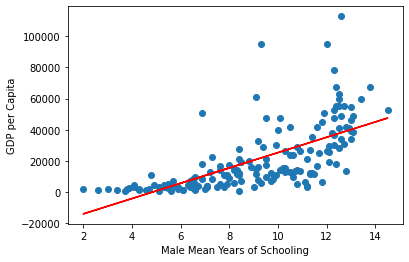

In [101]:
X = maleYrsSchool_GDP["Male_Mean_Years_of_Schooling"].to_numpy().reshape(-1,1)
Y = maleYrsSchool_GDP["GDP_per_Capita"].to_numpy().reshape(-1,1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Male Mean Years of Schooling")
plt.ylabel("GDP per Capita")
plt.show()

In [102]:
r2_score(Y, Y_pred)

0.44325922444529386